In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt

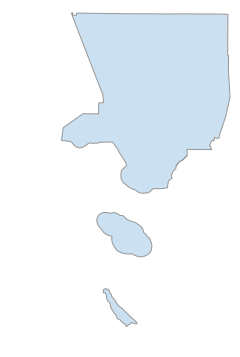

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x133399f28>)

In [6]:
la_county = ox.gdf_from_place('Los Angeles County, California')
ox.plot_shape(ox.project_gdf(la_county))

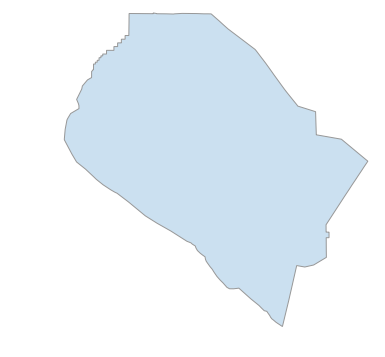

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13322c978>)

In [4]:
orange_county = ox.gdf_from_place('Orange County, California')
ox.plot_shape(ox.project_gdf(orange_county))

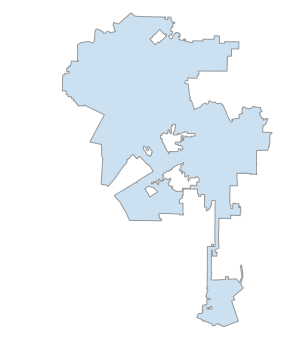

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13348a668>)

In [9]:
la_city = ox.gdf_from_place('Los Angeles, California')
ox.plot_shape(ox.project_gdf(la_city))

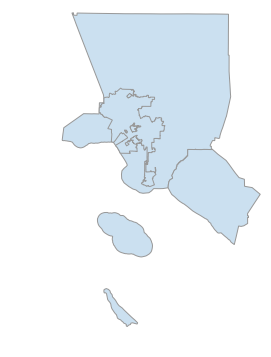

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13382ba90>)

In [11]:
places = ox.gdf_from_places(['Los Angeles County, California', 'Orange County, California', 'Los Angeles, California'])
places = ox.project_gdf(places)
ox.save_gdf_shapefile(places)
ox.plot_shape(ox.project_gdf(places))

In [12]:
ox.save_load.save_gdf_shapefile(la_city, filename='la_boundary')

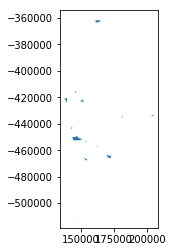

In [14]:
la_airp = gpd.read_file('Airp_bnd2012/airp_bnd2012.shp')

In [47]:
la_taz = gpd.read_file('LA_TAZ.shp')
la_taz.crs

{'init': 'epsg:26911'}

In [48]:
with fiona.open('LA_TAZ.shp') as f:
    input_schema = f.schema
input_schema['geometry'] = ('Polygon', 'MultiPolygon')

In [49]:
la_taz = la_taz.to_crs({'init': 'epsg:4326'})
la_taz.to_file('LA_TAZ.geojson', driver = 'GeoJSON', schema = input_schema)

In [51]:
with fiona.open('Airp_bnd2012/airp_bnd2012.shp') as f:
    input_schema = f.schema
la_airp = gpd.read_file('Airp_bnd2012/airp_bnd2012.shp')
la_airp.crs

{'init': 'epsg:3310'}

In [52]:
la_airp = la_airp.to_crs({'init': 'epsg:4326'})
input_schema['geometry'] = ('Polygon', 'MultiPolygon')
la_airp.to_file('LA_Airports.geojson', driver = 'GeoJSON', schema = input_schema)

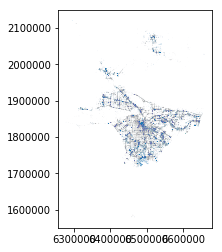

In [56]:
with fiona.open('LARIAC_PARKING_LOTS_2014/LARIAC_PARKING_LOTS_2014.shp') as f:
    input_schema = f.schema
la_parking = gpd.read_file('LARIAC_PARKING_LOTS_2014/LARIAC_PARKING_LOTS_2014.shp')
la_parking.plot()

In [66]:
la_parking = la_parking.dropna()

In [67]:
la_parking = la_parking.to_crs({'init': 'epsg:4326'})
#input_schema['geometry'] = ('Polygon', 'MultiPolygon')
#la_parking.to_file('LA_Parking.geojson', driver = 'GeoJSON')

In [69]:
input_schema['geometry'] = ('Polygon', 'MultiPolygon')
la_parking.to_file('LA_Parking.geojson', driver = 'GeoJSON', schema = input_schema)

In [70]:
with fiona.open('Class_Airspace/Class_Airspace.shp') as f:
    input_schema = f.schema
la_airspace = gpd.read_file('Class_Airspace/Class_Airspace.shp')
la_airspace.crs

{'init': 'epsg:4326'}

In [73]:
la_airspace.columns.values.tolist()

['OBJECTID',
 'GLOBAL_ID',
 'IDENT',
 'ICAO_ID',
 'NAME',
 'UPPER_DESC',
 'UPPER_VAL',
 'UPPER_UOM',
 'UPPER_CODE',
 'LOWER_DESC',
 'LOWER_VAL',
 'LOWER_UOM',
 'LOWER_CODE',
 'TYPE_CODE',
 'LOCAL_TYPE',
 'CLASS',
 'MIL_CODE',
 'COMM_NAME',
 'LEVEL_',
 'SECTOR',
 'ONSHORE',
 'EXCLUSION',
 'WKHR_CODE',
 'WKHR_RMK',
 'DST',
 'GMTOFFSET',
 'CONT_AGENT',
 'CITY',
 'STATE',
 'COUNTRY',
 'ADHP_ID',
 'US_HIGH',
 'AK_HIGH',
 'AK_LOW',
 'US_LOW',
 'US_AREA',
 'PACIFIC',
 'Shape__Are',
 'Shape__Len',
 'geometry']

In [74]:
la_airspace['CLASS'].value_counts()

E    4309
D     623
B     411
C     384
A       4
Name: CLASS, dtype: int64

In [75]:
la_airspace = la_airspace[la_airspace['CITY'] == 'LOS ANGELES']
la_airspace_A = la_airspace[la_airspace['CLASS'] == 'A']
la_airspace_B = la_airspace[la_airspace['CLASS'] == 'B']
la_airspace_C = la_airspace[la_airspace['CLASS'] == 'C']
la_airspace_D = la_airspace[la_airspace['CLASS'] == 'D']
la_airspace_E = la_airspace[la_airspace['CLASS'] == 'E']

In [85]:
len(la_airspace_E)

4

In [86]:
la_airspace_B.to_file('LA_Airspace_B.geojson', driver = 'GeoJSON')
la_airspace_D.to_file('LA_Airspace_D.geojson', driver = 'GeoJSON')
la_airspace_E.to_file('LA_Airspace_E.geojson', driver = 'GeoJSON')


In [38]:
tazs = gpd.read_file('tier1/Tier1FinalwSED_5222015.shp')

In [44]:
tazs = tazs.to_crs({'init': 'epsg:4326'})
tazs.to_file('ta.geojson', driver = 'GeoJSON')

In [32]:
input_schema

{'properties': OrderedDict([('AirportID', 'str:3'),
              ('Facility', 'str:50'),
              ('MapLabel', 'str:50'),
              ('City', 'str:50'),
              ('County', 'str:50'),
              ('FnctnlClss', 'str:50'),
              ('ClassCode', 'int:4'),
              ('StateClass', 'str:50'),
              ('FAASrvcLvl', 'str:25'),
              ('FAASiteNo', 'str:25'),
              ('District', 'int:4'),
              ('5010URL', 'str:254')]),
 'geometry': 'Polygon'}

In [40]:
input_schema['geometry'] = ('Polygon', 'MultiPolygon')
input_schema

{'properties': OrderedDict([('AirportID', 'str:3'),
              ('Facility', 'str:50'),
              ('MapLabel', 'str:50'),
              ('City', 'str:50'),
              ('County', 'str:50'),
              ('FnctnlClss', 'str:50'),
              ('ClassCode', 'int:4'),
              ('StateClass', 'str:50'),
              ('FAASrvcLvl', 'str:25'),
              ('FAASiteNo', 'str:25'),
              ('District', 'int:4'),
              ('5010URL', 'str:254')]),
 'geometry': ('Polygon', 'MultiPolygon')}

In [16]:
import fiona
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [37]:
la_airp.to_csv('airpo.csv')

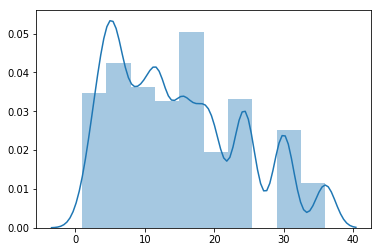

In [102]:
import numpy as np
import seaborn as sns

def biased_die(x2):
    if x2 == 1:
        return (1)
    elif x2 == 2:
        return (2)
    elif 3<= x2 <= 5:
        return (3)
    elif 6 <= x2 <= 8:
        return (4)
    elif 9 <= x2 <= 12:
        return (5)
    elif 13 <= x2 <=16:
        return (6)


y = []

for i in range(0,10000):
    x1 = np.random.randint(1, 7)
    x2 = biased_die(np.random.randint(1, 17))
    y.append(x1*x2)
    
sns.distplot(y, bins = 10)

In [98]:
np.var(y)

84.90853358999998

In [99]:
np.mean(y)

14.8879